In [38]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

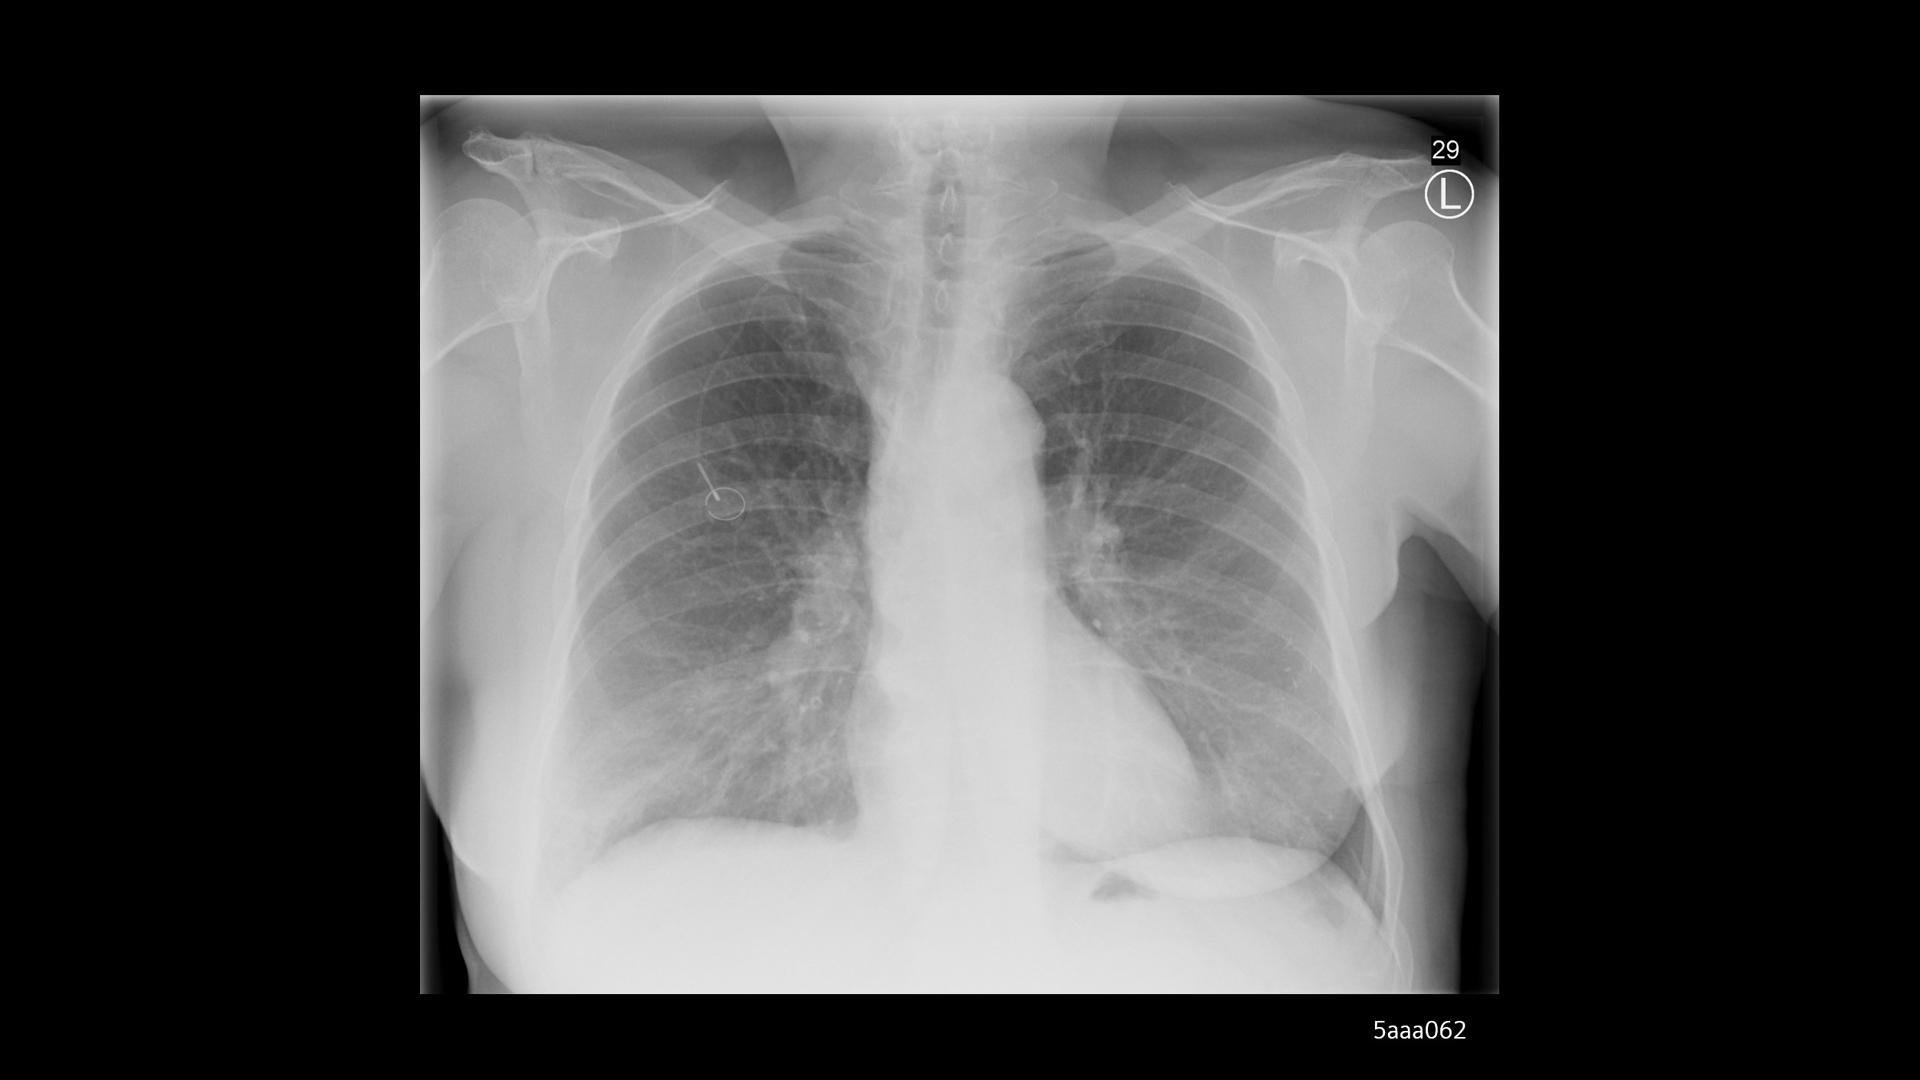

In [39]:
img = Image.open('COVID-1007.jpg').convert('RGB')
img

In [40]:
trans = transforms.Compose([transforms.ToTensor()])
transimg = trans(img)


In [41]:
model = torchvision.models.resnet152(pretrained=False)

model.fc = torch.nn.Linear(2048,4)



In [42]:
model.load_state_dict(torch.load('xyz_epoch_1.pt'))

<All keys matched successfully>

In [43]:
model.eval()
with torch.no_grad():
    output = model(transimg.unsqueeze(0))
    

In [44]:
output

tensor([[ 1.7947, -0.5868, -1.7336,  0.3769]])

In [45]:
classes = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [46]:
classes[torch.argmax(output).item()]

'COVID'